Sampling Frequency: 24000
Total Number of Samples: 683136
The Length of n is  683136


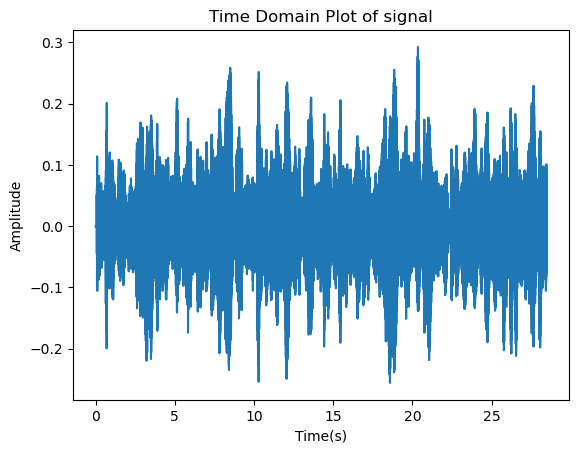

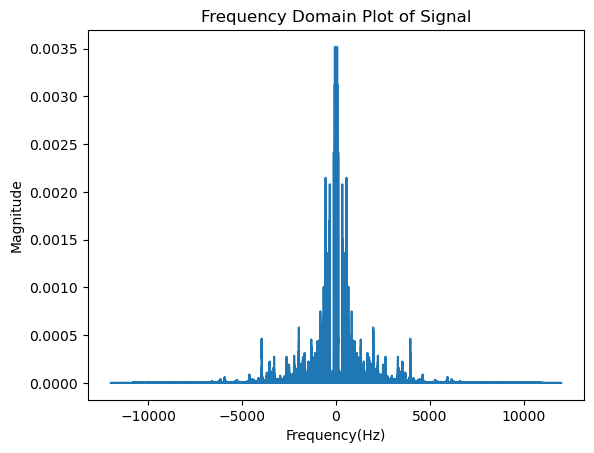

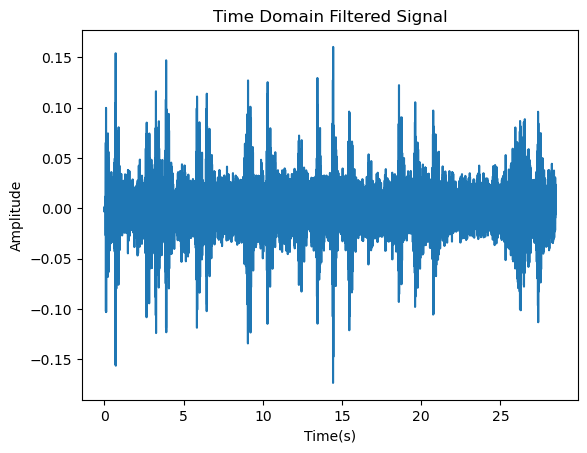

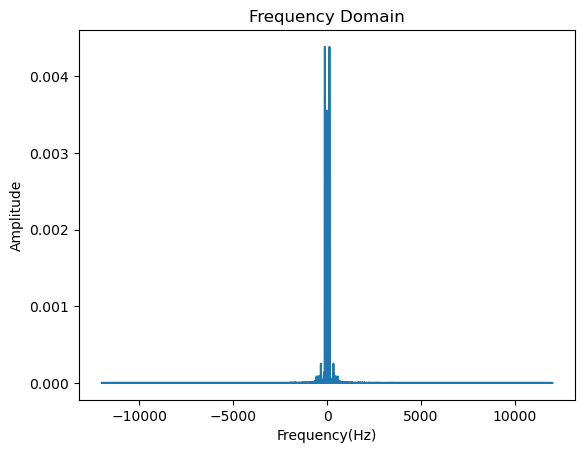

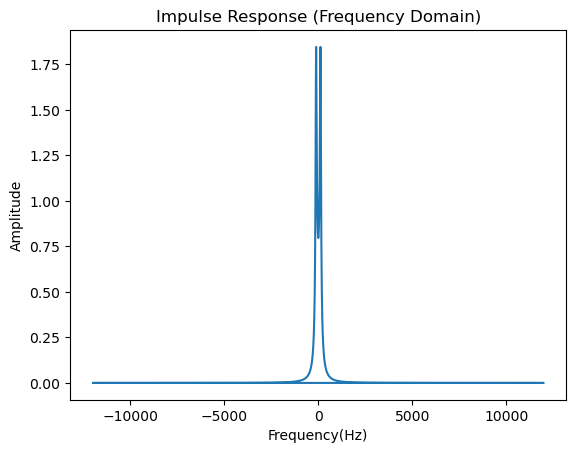

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import  fft, ifft, fftshift, fftfreq 
import soundfile as sf
from IPython.display import Audio
import math

audio = 'violins.mp3' # make sure the audio file is in your working directory
y, fs = sf.read(audio) # read in audio data (y) and sampling frequency (fs)
print("Sampling Frequency:", fs) #audio clip sampling frequency
N = len(y)
print("Total Number of Samples:", N)
q1 = np.zeros(len(y))
q2 = np.zeros(len(y))  

for i in range(len(y)):
    q1[i] = y[i][0]
    q2[i] = y[i][1]
    
q3 = q1 + q2
sf.write('added.wav',q3,fs)
T = 1/fs
n = np.arange(0,N*T,T) # 0 is the start time and 3.55 (N*T) (# of samples * seconds/sample) is the EXACT time duration of the audio signal
print("The Length of n is ", len(n))

  
plt.figure()
plt.title("Time Domain Plot of signal")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(n,q3)
plt.savefig('TimeDomainPlot.png')

freq = fftfreq(N,T)

Y = fft(q3)
plt.figure()
plt.title("Frequency Domain Plot of Signal")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude")
plt.plot(freq,np.abs(Y)/(N))
plt.savefig('FrequencyDomainPlot.png')


def hipassfilter(x): #x is the input
    y = np.zeros(len(x)) #since the input audio signal is a complex signal (real + imaginary component) these zeros
                             #must be complex as well (2d array)
 
    n = 2

    for n in range(len(x)):
      
        y[n] = 10*(x[n] - 2*x[n-1] +x[n-2])
        y[n] = 10*(x[n] - 2*x[n-1] +x[n-2])
    return y


def lowpassfilter(x): #Cutoff at approximately 100Hz
    y = np.zeros(len(x)) #since the input audio signal is a complex signal (real + imaginary component) these zeros
                             #must be complex as well (2d array)
 
    n = 2
#****************************** LOWPASS
    for n in range(len(x)): 
        
        y[n] = 0.00013*(x[n] + 2*x[n-1] + x[n-2]) +1.965*y[n-1] - 0.966*y[n-2]   
    
    for n in range(len(x)):
        
        y[n] = 0.0002*(x[n] + 2*x[n-1] + x[n-2]) +1.985*y[n-1] - 0.986*y[n-2]
    
    return y


        
y2 = lowpassfilter(q3)
plt.figure()
plt.title("Time Domain Filtered Signal")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(n,y2)
plt.savefig('FilteredTimeDomainSignal.png')
Y2 = fft(y2)
Y3 = np.abs(Y2)

plt.figure()
plt.title("Frequency Domain")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude")
plt.plot(freq,Y3/N)
plt.savefig('FilteredFrequencyDomain.png')

sf.write('result2.wav',y2,fs)




#******************Plotting the Impulse Response of the Filter*************************************

w = np.zeros(len(y))
w[0] = 1
w2 = lowpassfilter(w)

W = fft(w2)

plt.figure()
plt.title("Impulse Response (Frequency Domain)")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude")
plt.plot(freq,np.abs(W))
plt.savefig('ImpulseResponseFrequency.png')
